In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns= None
pd.options.display.max_rows= None

In [2]:
!ls

 africa-economic-banking-and-systemic-crisis.ipynb
 african_crises.csv
'African Crisis Prediction.ipynb'
 balance-scale.data
 balance-scale.names
 data.csv
'gildas_habimana_coding_part_14_06_2020 .ipynb'
 gildas_habimana_coding_part_28_5_2020.ipynb
 gildas_habimana_coding_part.ipynb
 mytable.tex
 visualizing-africa.ipynb


In [3]:
data= pd.read_csv("african_crises.csv")
print(data.shape)
display(data.head())


(1059, 14)


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [6]:
data.case.value_counts()

19    155
56    114
70     90
1      85
2      77
63     75
40     75
69     72
38     68
35     67
15     63
45     60
10     58
Name: case, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 115.9+ KB


## Exploratory Data Analysis - EDA

In [48]:
# sns.pairplot(data, hue="banking_crisis")


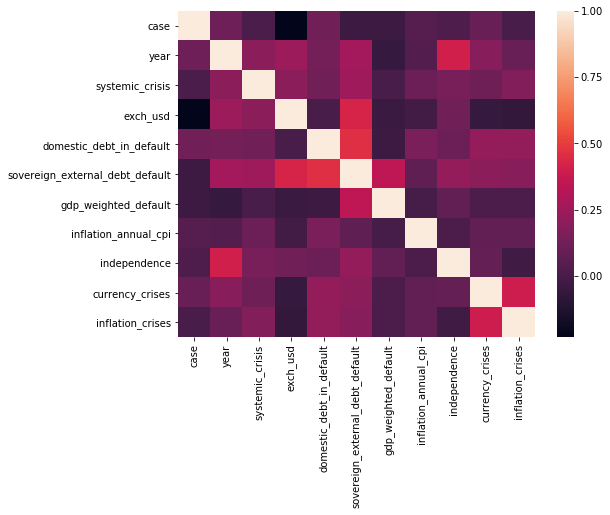

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr())
plt.show()

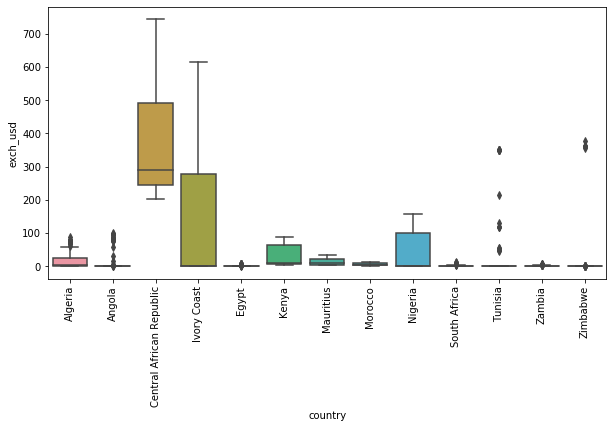

In [12]:
plt.figure(figsize=[10,5])
sns.boxplot(x="country",y="exch_usd", data=data )
plt.xticks(rotation = 90)
plt.show()

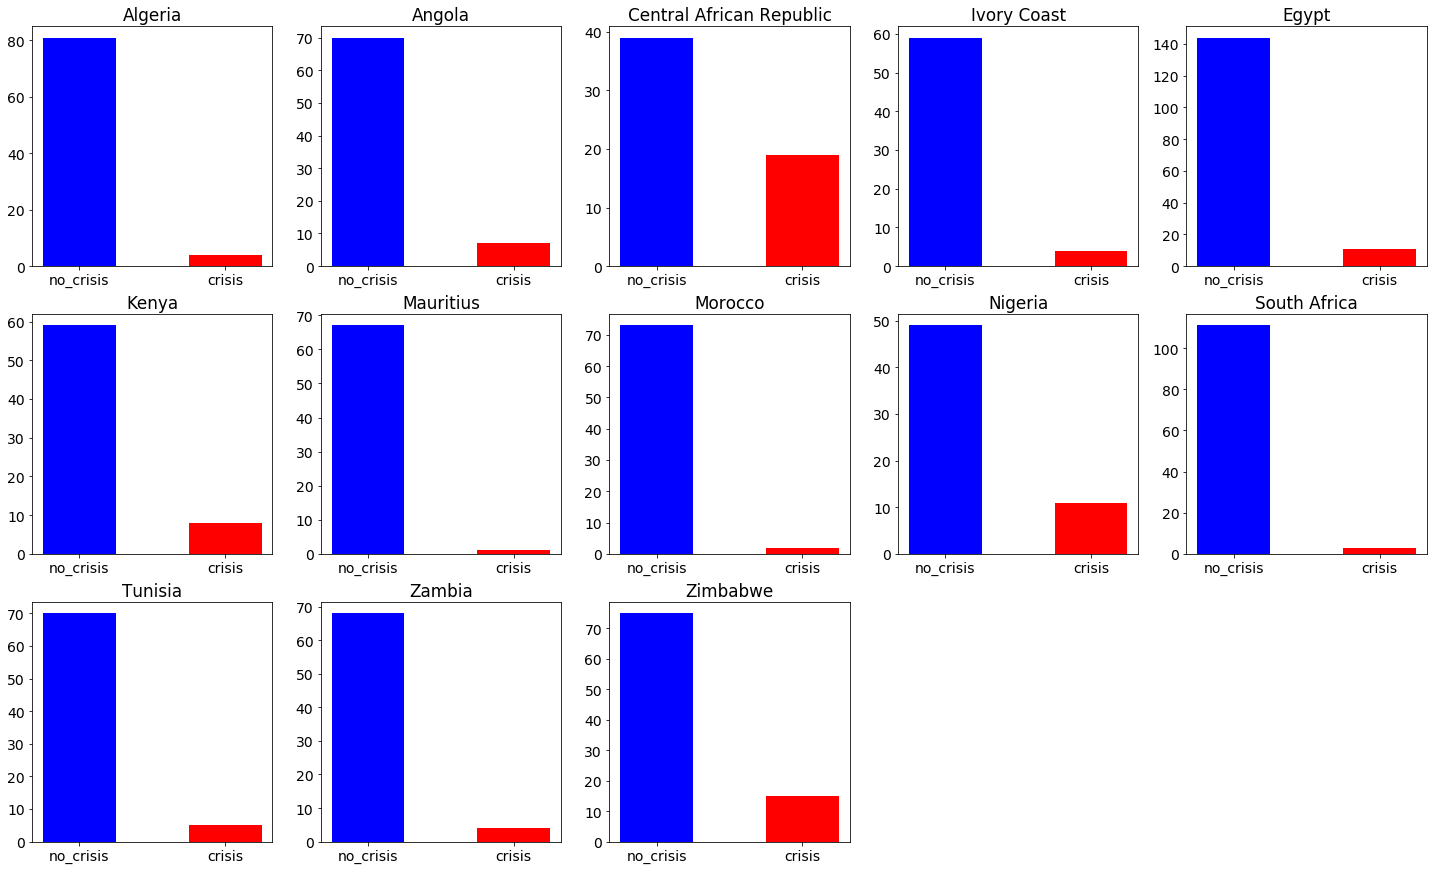

In [13]:
plt.rcParams.update({'font.size': 14})
fig=plt.figure(figsize=(25,15))
countries=data['country'].unique()

for i in range(len(countries)):
    ax=fig.add_subplot(3,5,i+1)
    d=data[data['country']==countries[i]]['banking_crisis'].value_counts()
    ax.bar(d.index, d, color=['blue','red'], width=0.5)
    ax.set_title(countries[i])
plt.show()

## Features Ingeneering

In [14]:
data.banking_crisis= data.banking_crisis.map({"crisis":1, "no_crisis":0})
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [15]:
cols_to_drop= ["case", "cc3", "year"]

data.drop(cols_to_drop, axis=1, inplace=True)

data.head()

,country,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,Algeria,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,Algeria,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,Algeria,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,Algeria,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [16]:
def encode_categorical_col(df, col_name):
    unique_values= df[col_name].unique()
    
    mapping_dict= {}
    for k,v in enumerate(unique_values):
        mapping_dict[v]= k
        
    df[col_name]= df[col_name].map(mapping_dict)
    
    return df



In [17]:
data= encode_categorical_col(data, "country")

data.head()

,country,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,0,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,0,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,0,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,0,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


### Resampling

In [18]:
def data_resampling(data):
    """
    This consist of upsampling the minority class
    """
    from sklearn.utils import resample
    
    ## Separate majority and minority classes
    data_majority = data[data.banking_crisis==0]
    data_minority = data[data.banking_crisis==1]
    
    print("Before resampling")
    print("Majority: {} Samples\t=> {:.2%}".format(data_majority.shape[0], data_majority.shape[0]/data.shape[0]))
    print("Minority: {} Samples\t=> {:.2%}\n".format(data_minority.shape[0], data_minority.shape[0]/data.shape[0]))

    # Upsample minority class
    data_minority_upsampled = resample(data_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=data_majority.shape[0],    # to match majority class
                                     random_state=21) # reproducible results

    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])
    
    print("After resampling")
    print("Majority: {} Samples".format(data_upsampled[data_upsampled.banking_crisis==0].shape[0]))
    print("Minority: {} Samples".format(data_upsampled[data_upsampled.banking_crisis==1].shape[0]))
    
    labels = ['Crisis','No_crisis']
    explode=(0.1,0)
    plt.pie( data_upsampled.banking_crisis.value_counts()/data_upsampled.shape[0], explode=explode, 
        labels=labels, autopct='%1.1f%%', startangle=90
    )
    
    return data_upsampled

Before resampling
Majority: 965 Samples	=> 91.12%
Minority: 94 Samples	=> 8.88%

After resampling
Majority: 965 Samples
Minority: 965 Samples


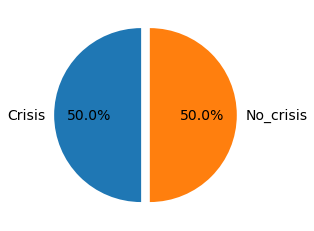

In [19]:
data_upsampled = data_resampling(data)

## Modeling

In [20]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val= train_test_split(data_upsampled.drop("banking_crisis", axis=1), data_upsampled.banking_crisis, test_size=.25)

In [22]:
def train_test_model(model, X_train= X_train, X_val= X_val, y_train= y_train, y_val= y_val):

    model.fit(X_train, y_train)

    print("Train Score: {:.2%}".format(model.score(X_train, y_train)))
    print("Test Score: {:.2%}".format(model.score(X_val, y_val)))

    print("AUC Score: {:.2%}".format(roc_auc_score(y_val, model.predict(X_val))))
    
    y_preds= model.predict(X_val)
    print("\nConfusion matrix:")
    print(confusion_matrix(y_val, y_preds))
    
    print("\nClassification report:")
    print(classification_report(y_val, y_preds))
    

#### Logistic Regression

In [23]:
lr= LogisticRegression()

train_test_model(lr)

Train Score: 56.05%
Test Score: 58.80%
AUC Score: 57.34%

Confusion matrix:
[[ 37 196]
 [  3 247]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.16      0.27       233
           1       0.56      0.99      0.71       250

    accuracy                           0.59       483
   macro avg       0.74      0.57      0.49       483
weighted avg       0.73      0.59      0.50       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision Tree

In [24]:
dtree= DecisionTreeClassifier()

train_test_model(dtree)

Train Score: 100.00%
Test Score: 98.96%
AUC Score: 98.93%

Confusion matrix:
[[228   5]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       233
           1       0.98      1.00      0.99       250

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483



#### SVC

In [25]:
svc= SVC()

train_test_model(svc)

Train Score: 98.69%
Test Score: 94.82%
AUC Score: 94.88%

Confusion matrix:
[[225   8]
 [ 17 233]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       233
           1       0.97      0.93      0.95       250

    accuracy                           0.95       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.95      0.95      0.95       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Random Forest

In [26]:
rf= RandomForestClassifier()

train_test_model(rf)

Train Score: 100.00%
Test Score: 99.59%
AUC Score: 99.57%

Confusion matrix:
[[231   2]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       233
           1       0.99      1.00      1.00       250

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Passive Aggressive Classifier

In [27]:
pac= PassiveAggressiveClassifier()

train_test_model(pac)

Train Score: 91.15%
Test Score: 91.51%
AUC Score: 91.57%

Confusion matrix:
[[217  16]
 [ 25 225]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       233
           1       0.93      0.90      0.92       250

    accuracy                           0.92       483
   macro avg       0.92      0.92      0.92       483
weighted avg       0.92      0.92      0.92       483



#### SGDClassifier - Stochastic Gradient Descent Classifier

In [28]:
sgd= SGDClassifier()

train_test_model(sgd)

Train Score: 59.30%
Test Score: 55.69%
AUC Score: 54.87%

Confusion matrix:
[[ 73 160]
 [ 54 196]]

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.31      0.41       233
           1       0.55      0.78      0.65       250

    accuracy                           0.56       483
   macro avg       0.56      0.55      0.53       483
weighted avg       0.56      0.56      0.53       483



#### Ridge Classifier

In [29]:
ridge= RidgeClassifier()

train_test_model(ridge)

Train Score: 94.06%
Test Score: 94.62%
AUC Score: 94.79%

Confusion matrix:
[[232   1]
 [ 25 225]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       233
           1       1.00      0.90      0.95       250

    accuracy                           0.95       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.95      0.95      0.95       483



#### Bagging Classifier

In [30]:
bag= RandomForestClassifier()

train_test_model(bag)

Train Score: 100.00%
Test Score: 99.38%
AUC Score: 99.36%

Confusion matrix:
[[230   3]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       233
           1       0.99      1.00      0.99       250

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### AdaBoostClassifier

In [31]:
xboost= AdaBoostClassifier()

train_test_model(xboost)

Train Score: 97.79%
Test Score: 96.89%
AUC Score: 96.94%

Confusion matrix:
[[229   4]
 [ 11 239]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       233
           1       0.98      0.96      0.97       250

    accuracy                           0.97       483
   macro avg       0.97      0.97      0.97       483
weighted avg       0.97      0.97      0.97       483



#### KNN

In [32]:
knn = AdaBoostClassifier()

train_test_model(knn)

Train Score: 97.79%
Test Score: 96.89%
AUC Score: 96.94%

Confusion matrix:
[[229   4]
 [ 11 239]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       233
           1       0.98      0.96      0.97       250

    accuracy                           0.97       483
   macro avg       0.97      0.97      0.97       483
weighted avg       0.97      0.97      0.97       483



#### XGBClassifier

In [46]:
from xgboost.sklearn import XGBClassifier

xboot = XGBClassifier()

train_test_model(xboot)

Train Score: 99.45%
Test Score: 99.17%
AUC Score: 99.14%

Confusion matrix:
[[229   4]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       233
           1       0.98      1.00      0.99       250

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483



### Normalized the data

In [33]:
normalizer= Normalizer()

In [34]:
normalizer.fit(X_train)

X_train_nor= normalizer.transform(X_train)
X_val_nor= normalizer.transform(X_val)

#### Logistic Regression

In [35]:
lr= LogisticRegression()

train_test_model(lr, X_train_nor, X_val_nor)

Train Score: 73.88%
Test Score: 75.36%
AUC Score: 74.93%

Confusion matrix:
[[146  87]
 [ 32 218]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       233
           1       0.71      0.87      0.79       250

    accuracy                           0.75       483
   macro avg       0.77      0.75      0.75       483
weighted avg       0.77      0.75      0.75       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision Tree

In [36]:
dtree= DecisionTreeClassifier()

train_test_model(dtree, X_train_nor, X_val_nor)

Train Score: 100.00%
Test Score: 99.79%
AUC Score: 99.79%

Confusion matrix:
[[232   1]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       250

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



#### SVC

In [37]:
svc= SVC()

train_test_model(svc, X_train_nor, X_val_nor)

Train Score: 73.81%
Test Score: 74.74%
AUC Score: 74.18%

Confusion matrix:
[[136  97]
 [ 25 225]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.58      0.69       233
           1       0.70      0.90      0.79       250

    accuracy                           0.75       483
   macro avg       0.77      0.74      0.74       483
weighted avg       0.77      0.75      0.74       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Random Forest

In [38]:
rf= RandomForestClassifier()

train_test_model(rf, X_train_nor, X_val_nor)

/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 100.00%
Test Score: 100.00%
AUC Score: 100.00%

Confusion matrix:
[[233   0]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       250

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



#### Passive Aggressive Classifier

In [39]:
pac= PassiveAggressiveClassifier()

train_test_model(pac, X_train_nor, X_val_nor)

Train Score: 76.99%
Test Score: 74.53%
AUC Score: 74.60%

Confusion matrix:
[[178  55]
 [ 68 182]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       233
           1       0.77      0.73      0.75       250

    accuracy                           0.75       483
   macro avg       0.75      0.75      0.75       483
weighted avg       0.75      0.75      0.75       483



#### SGDClassifier - Stochastic Gradient Descent Classifier

In [40]:
sgd= SGDClassifier()

train_test_model(sgd, X_train_nor, X_val_nor)

Train Score: 79.20%
Test Score: 80.95%
AUC Score: 80.37%

Confusion matrix:
[[149  84]
 [  8 242]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.64      0.76       233
           1       0.74      0.97      0.84       250

    accuracy                           0.81       483
   macro avg       0.85      0.80      0.80       483
weighted avg       0.84      0.81      0.80       483



#### Ridge Classifier

In [41]:
ridge= RidgeClassifier()

train_test_model(ridge, X_train_nor, X_val_nor)

Train Score: 76.85%
Test Score: 78.47%
AUC Score: 78.02%

Confusion matrix:
[[152  81]
 [ 23 227]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75       233
           1       0.74      0.91      0.81       250

    accuracy                           0.78       483
   macro avg       0.80      0.78      0.78       483
weighted avg       0.80      0.78      0.78       483



#### Bagging Classifier

In [42]:
bag= RandomForestClassifier()

train_test_model(bag, X_train_nor, X_val_nor)

Train Score: 100.00%
Test Score: 100.00%
AUC Score: 100.00%

Confusion matrix:
[[233   0]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       250

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



/home/ebiele/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### AdaBoostClassifier

In [43]:
xboost= AdaBoostClassifier()

train_test_model(xboost, X_train_nor, X_val_nor)

Train Score: 99.65%
Test Score: 98.96%
AUC Score: 98.93%

Confusion matrix:
[[228   5]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       233
           1       0.98      1.00      0.99       250

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483



#### KNN

In [44]:
knn = AdaBoostClassifier()

train_test_model(knn, X_train_nor, X_val_nor)

Train Score: 99.65%
Test Score: 98.96%
AUC Score: 98.93%

Confusion matrix:
[[228   5]
 [  0 250]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       233
           1       0.98      1.00      0.99       250

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483



#### XGBClassifier

In [45]:
from xgboost.sklearn import XGBClassifier

xboot = XGBClassifier()

train_test_model(xboot, X_train_nor, X_val_nor)

Train Score: 99.38%
Test Score: 98.76%
AUC Score: 98.77%

Confusion matrix:
[[231   2]
 [  4 246]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       233
           1       0.99      0.98      0.99       250

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483

